## Bio-Signal Data Processing

## Basics

In [ ]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.0 MB/s eta 0:00:00


In [ ]:
# Basic
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mne

In [ ]:
# MNE
import mne
from mne.datasets.sleep_physionet.age import fetch_data
import torch

mne.set_log_level('ERROR')

## Fetching Data

```
subjects = range(5) # Range of people considered
recordings = [1] # Considering only the first recording

# List of File Path for EEG Data
#Params: Subjects, recordings, if missing warn rather than error
fnames = fetch_data(subjects=subjects, recording=recordings, on_missing='warn')

destination_directory = '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/PSG_Data'
files_with_paths = []


for file_name in os.listdir(destination_directory):
    full_path = os.path.join(destination_directory, file_name)
        if full_path.lower().endswith('.edf'):
        files_with_paths.append(full_path)


print(files_with_paths)
```



In [ ]:
destination_directory = '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/'
files_with_paths = []


for file_name in os.listdir(destination_directory):

    full_path = os.path.join(destination_directory, file_name)

    if full_path.lower().endswith('.edf'):
        files_with_paths.append(full_path)


print(files_with_paths)

['/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4031E0-PSG.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4021EH-Hypnogram.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4031EC-Hypnogram.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4011EH-Hypnogram.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4001EC-Hypnogram.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4021E0-PSG.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4011E0-PSG.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4041E0-PSG.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4001E0-PSG.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4041EC-Hypnogram.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_

In [ ]:
def group_PSG_Hyno_Pairs(files_with_paths):
    fnames_grouped = {}
    for file in files_with_paths:
        file_name = os.path.basename(file)
        subject_id = file_name[:15]
        file_type = file_name[17:-4]

        if subject_id not in fnames_grouped:
            fnames_grouped[subject_id] = {'PSG': [], 'Hypnogram': []}

        if 'PSG' in file_type:
            fnames_grouped[subject_id]['PSG'].append(file)
        elif 'Hypnogram' in file_type:
            fnames_grouped[subject_id]['Hypnogram'].append(file)

    result = []
    for subject, types in fnames_grouped.items():
        fnames_grouped_for_subject = []
        fnames_grouped_for_subject.extend(types['PSG'])  # Add all PSG files
        fnames_grouped_for_subject.extend(types['Hypnogram'])  # Add all Hypnogram files
        result.append(fnames_grouped_for_subject)

    return result

In [ ]:
fnames_grouped = group_PSG_Hyno_Pairs(files_with_paths)
print(fnames_grouped)

[['/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4031E0-PSG.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4031EC-Hypnogram.edf'], ['/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4021E0-PSG.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4021EH-Hypnogram.edf'], ['/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4011E0-PSG.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4011EH-Hypnogram.edf'], ['/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4001E0-PSG.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4001EC-Hypnogram.edf'], ['/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4041E0-PSG.edf', '/content/drive/MyDrive/Colab_Notebooks/Research_Coding/EEG_Data/Copy of SC4041EC-Hypnogram.edf'], ['/content/drive/MyDrive/Colab_Notebook

## Load Function Details
*   Loads the Sleep Physionet Dataset and pre - processes it
*   Parameter passed description: -
  *   raw_fname (str) : Has path to the .edf file and contains the data.
      * The ***PSG.edf** files are whole-night polysmnographic sleep recordings containing **EEG (from Fpz-Cz and Pz-Oz electrode locations), EOG (horizontal), submental chin EMG, and an event marker**.
      * The **SC*PSG.edf** files (see the 'sleep cassette study') often also contain **oro-nasal respiration and rectal body temperature**.  
  *   annot_fname (str) : Has path to the Hypnogram file containing annotation data.
      * The ***Hypnogram.edf** files contain annotations of the sleep patterns that correspond to the PSGs.
      * These patterns (hypnograms) consist of sleep stages W, R, 1, 2, 3, 4, M (Movement time) and ? (not scored).
      * All hypnograms were manually scored according to the 1968 Rechtschaffen and Kales manual, but based on Fpz-Cz/Pz-Oz EEGs.
  * load_eeg_only (bool) : If **True**, keeps only EEG modality and discards other from the dataset. If **False**, assigns EOG, EMG etc to specific channels.
  * crop_wake_mins (int) : Cuts down the recording to keep only a margin (in minutes) before the first sleep event and after the last one, removing excess wake data.





### Special Function descriptions
**read_raw_edf() Parameters: -**
*   input_fname : Path to .edf data file.
*   exclude : List of channel names to exclude from loading into data.
*   include : List of channel names to be included (exclude must ne empty / null).
*   preload (bool : default false) : Preload data into memory for data manipulation and faster indexing. If True, the data will be preloaded into memory (fast, requires large amount of memory).

**mne.read_annotations() [Attribute of the MNE Annotations object] : -**

When you load annotations using mne.read_annotations(), it returns an object of type mne.Annotations that contains several attributes such as:
*    onset: The start time (in seconds) for each annotation.
*    duration: The duration of each annotation.
*    description: A list of strings describing each annotation (e.g., sleep stage labels).




In [ ]:
def load_sleep_physionet_raw(raw_fname, annot_fname, load_eeg_only = True, crop_wake_mins = 30):
  mapping = {'EOG horizontal': 'eog',
             'Resp oro-nasal': 'misc',
             'EMG submental': 'misc',
             'Temp rectal': 'misc',
             'Event marker': 'misc'}
  exclude_channels = mapping.keys() if load_eeg_only else ()
  raw_data = mne.io.read_raw_edf(raw_fname, exclude = exclude_channels)
  data_annotations = mne.read_annotations(annot_fname)

  raw_data.set_annotations(data_annotations)

  if not load_eeg_only:
    raw_data.set_channel_types(mapping)

  wake_crop_vector = ['1', '2', '3', '4', 'R']
  if crop_wake_mins > 0:
    sleep_stage_inds = []
    sleep_true_store = []
    for x in data_annotations.description:
      if x[-1] in wake_crop_vector:
        sleep_true_store.append(True)
      else:
        sleep_true_store.append(False)

    sleep_stage_inds = np.where(sleep_true_store)[0]
    tmin = data_annotations[int(sleep_stage_inds[0])]['onset'] - crop_wake_mins * 60
    tmax = data_annotations[int(sleep_stage_inds[-1])]['onset'] + crop_wake_mins * 60

    raw_data.crop(tmin = tmin, tmax = tmax)

  ch_names = {i: i.replace('EEG ', '')
              for i in raw_data.ch_names if 'EEG' in i}
  mne.rename_channels(raw_data.info, ch_names)
  basename = os.path.basename(raw_fname)
  # ../../Research_Coding/EEG_Data/Copy of SC4041E0-PSG.edf
  # ../../Research_Coding/EEG_Data/Copy of SC4151EC-Hypnogram.edf
  subj_nb, rec_nb = (basename[10:14]), int(basename[15])
  raw_data.info['subject_info'] = {'his_id': subj_nb, 'id': rec_nb}
  return raw_data

In [ ]:
# def load_sleep_physionet_raw(raw_fname, annot_fname, load_eeg_only=True, crop_wake_mins=30):
#     mapping = {'EOG horizontal': 'eog',
#                'Resp oro-nasal': 'misc',
#                'EMG submental': 'misc',
#                'Temp rectal': 'misc',
#                'Event marker': 'misc'}

#     exclude = mapping.keys() if load_eeg_only else ()
#     raw = mne.io.read_raw_edf(raw_fname, exclude=exclude)
#     annots = mne.read_annotations(annot_fname)
#     raw.set_annotations(annots, emit_warning=False)

#     if not load_eeg_only:
#         raw.set_channel_types(mapping)

#     if crop_wake_mins > 0:
#         mask = [x[-1] in ['1', '2', '3', '4', 'R']
#                 for x in annots.description]
#         sleep_event_inds = np.where(mask)[0]


#         tmin = annots[int(sleep_event_inds[0])]['onset'] - \
#                crop_wake_mins * 60
#         tmax = annots[int(sleep_event_inds[-1])]['onset'] + \
#                crop_wake_mins * 60
#         raw.crop(tmin=tmin, tmax=tmax)


#     ch_names = {i: i.replace('EEG ', '')
#                 for i in raw.ch_names if 'EEG' in i}
#     mne.rename_channels(raw.info, ch_names)


#     basename = os.path.basename(raw_fname)
#     # '../../edf_data/edf_data/SC4151E0-PSG.edf'
#     subj_nb, rec_nb = int(basename[11:13]), int(basename[13])
#     raw.info['subject_info'] = {'id': subj_nb, 'rec_id': rec_nb}

#     return raw

## Plotting For EEG (Basic)

In [ ]:
data_raws = [load_sleep_physionet_raw(f[0], f[1]) for f in fnames_grouped]

## Frequency Observation and coorelation to Sleep Stages

Delta (0.5–4 Hz), Theta (4–8 Hz), Alpha (8–12 Hz), Sigma (12–16 Hz), Beta (16–25 Hz).

* **Delta (0.5 - 4 Hz)** : Appears during SS3 but becomes prominent in SS4, comprising the highest amplitude.

* **Theta (4 - 8 Hz)** : Starts to appear in SS1 and becomes prevalent in SS2 along with the presence of sleep spindles.

* **Alpha (8 - 12 Hz)** : Frequency oscillations present during WK and SS1 with higher voltage in WK.

* **Sigma (12 - 16 Hz)** : Present for a short duration, and its activity can be seen during SS2.

* **Beta (16 - 25 Hz)** : Prominent during WK along with the rapid variation in EEG signal.

* **Gamma (30 - 100 Hz)** : Responsible for cognitive and motor functions. Its occurrence is rare and cannot be seen through naked eyes.

* **Sawtooth wave (2 - 6 Hz)** : Burst of slow oscillations recorded from the fronto-central region of the brain during the REM stage

Wake alpha beta

n1 theta

n2 sleep spindles

n3 delta

rem

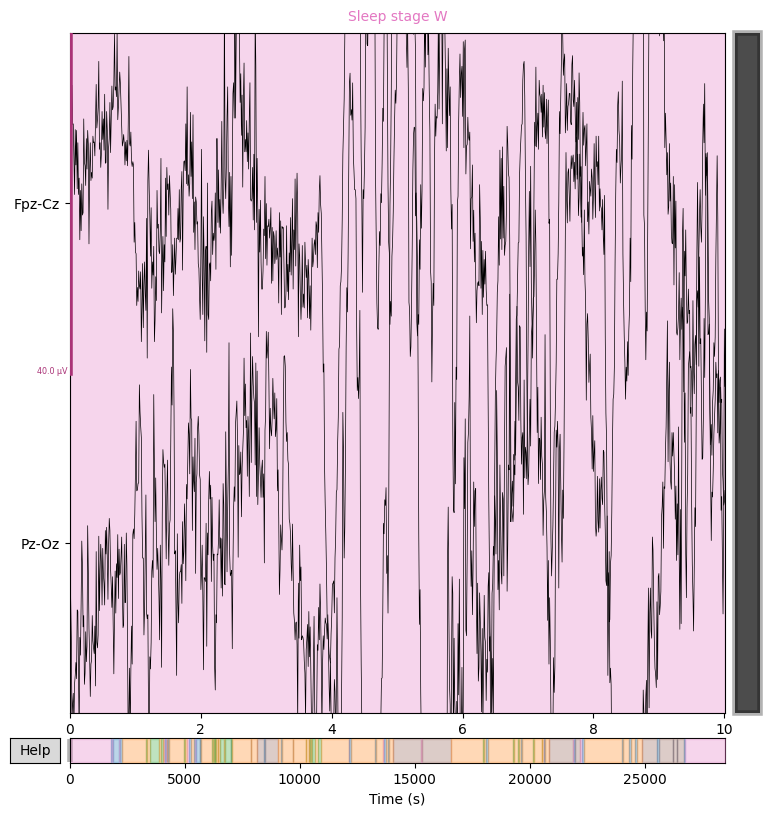

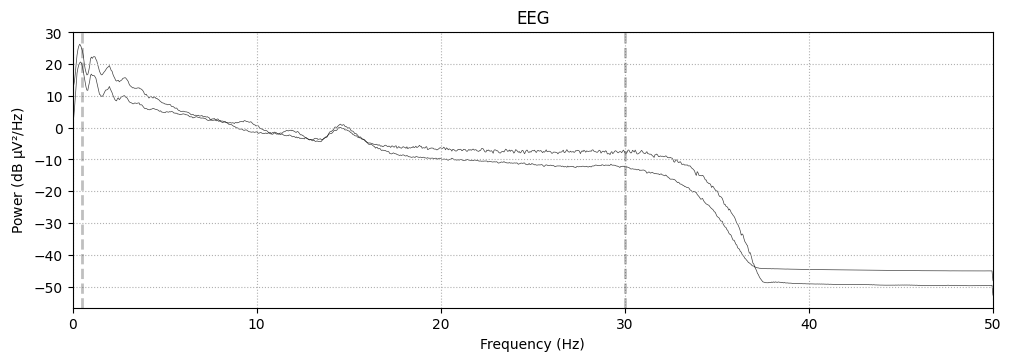

In [ ]:
data_raws[0].plot();
l_freq, h_freq = 0, 30

for raw in data_raws:
    raw.load_data().filter(l_freq, h_freq)

data_raws[2].plot_psd();

## Epoch Creation
Sleep Staging typically works on 30-second epochs.

Epoch_List = [] vector of vector of 30 second segmented dataframes of the raw recording. Labels = [] same as Epoch_List but holds the sleep stage markers for that respective dataframe.

Individual Processing of each sample recording.

Functions Used : -
*   event_from_annotations() : -
    * Converts the annotations into an events array and an event_ids dictionary.
    * events: A NumPy array of shape (n_events, 3), where:
        * Column 0: The sample index at which the event occurs.
        * Column 1: The value before the event (often not used).
        * Column 2: The event code (an integer corresponding to the sleep stage).
    * event_ids: A dictionary mapping annotation descriptions (keys) to integer event codes.
*   mne.Epochs() : -
    * raw :- an instance of raw is passed
    * events : - ndarray of (n_events, 3) is passed like described earlier.
    * event_id : - A dict to access the associate event using key event ID stored with it.
    * tmin, tmax: - Start and end time of the epochs in seconds.
    * baseline : The time interval to consider as “baseline” when applying baseline correction.
    * preload : Load all epochs from disk when creating the object or wait before accessing each epoch (more memory efficient but can be slower).




In [ ]:
def event_maker(eventsFromAnnots):
    newEvents = []
    start = eventsFromAnnots[0, 0]
    index = 0
    end = eventsFromAnnots[-1, 0]
    while start < end + 3000:
        if index >= len(eventsFromAnnots):
            break
        if index + 1 < len(eventsFromAnnots) and start == eventsFromAnnots[index + 1, 0]:
            index += 1
        currEvent = [start, 0, eventsFromAnnots[index, 2]]
        newEvents.append(currEvent)
        start += 3000
    return np.array(newEvents)

In [ ]:
# Original Epoch_Creation Function

def epoch_creation(raw_data_list, epoch_length=30):
    epochs_list = []
    labels = []
    for raw in raw_data_list:
        sfreq = int(raw.info['sfreq'])
        annots = raw.annotations
        n_events, event_ids = mne.events_from_annotations(raw)
        events = event_maker(n_events)
        sleep_stage_ids = [1, 2, 3, 4, 5]
        filtered_events = [event for event in events if event[2] in sleep_stage_ids]
        filtered_event_ids = {key: value for key, value in event_ids.items() if value in sleep_stage_ids}

        filtered_events = np.array(filtered_events, dtype=int)

        if filtered_events.ndim != 2 or filtered_events.shape[1] != 3:
            raise ValueError(f"filtered_events must be of shape (N, 3), got {filtered_events.shape}")
        epochs = mne.Epochs(raw, filtered_events, event_id=filtered_event_ids, tmin=0, tmax=epoch_length - 1 / sfreq, baseline=None, preload=True)
        epochs_list.append(epochs)

        stage_mapping = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
        labels.extend([stage_mapping[event[2]] for event in filtered_events])

    return epochs_list, labels

Epoch_List, Labels = epoch_creation(data_raws[:5], epoch_length=30)
print(f"Total number of valid epochs: {len(Labels)}")
print(f"Shape of data from first valid Epochs object: {Epoch_List[1].get_data().shape}")

Total number of valid epochs: 4344
Shape of data from first valid Epochs object: (897, 2, 3000)


In [ ]:
events_found = mne.events_from_annotations(data_raws[7])
print(events_found)
print(events_found[0].shape)
new_events = event_maker(events_found[0])
print(new_events[:100])
print(new_events.shape)

(array([[2619000,       0,       6],
       [2799000,       0,       1],
       [2865000,       0,       2],
       [2892000,       0,       1],
       [2898000,       0,       2],
       [2949000,       0,       3],
       [2985000,       0,       4],
       [2988000,       0,       3],
       [2997000,       0,       4],
       [3000000,       0,       3],
       [3012000,       0,       4],
       [3030000,       0,       3],
       [3033000,       0,       4],
       [3039000,       0,       3],
       [3042000,       0,       1],
       [3054000,       0,       2],
       [3111000,       0,       3],
       [3123000,       0,       2],
       [3129000,       0,       3],
       [3132000,       0,       2],
       [3150000,       0,       5],
       [3234000,       0,       1],
       [3252000,       0,       2],
       [3321000,       0,       3],
       [3339000,       0,       4],
       [3351000,       0,       3],
       [3354000,       0,       4],
       [3381000,       0,  

In [ ]:
fixed_events = mne.make_fixed_length_events(data_raws[7], duration=30)
print(fixed_events)
print(fixed_events.shape)

[[2619000       0       1]
 [2622000       0       1]
 [2625000       0       1]
 ...
 [5517000       0       1]
 [5520000       0       1]
 [5523000       0       1]]
(969, 3)


## ML Model Preparation

In [ ]:
# Model building Helpers
!pip install imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Ensemble Model Preparation
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Accuracy metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
Epoch_List, Labels = epoch_creation(data_raws[:10])
print("Number of epochs:", len(Labels))
all_epochs_data = np.concatenate([epochs.get_data() for epochs in Epoch_List], axis=0)
n_epochs, n_channels, n_times = all_epochs_data.shape
'''
Shape -->
    n_epochs: Total number of epochs.
    n_channels: Number of channels (e.g., EEG electrodes).
    n_times: Number of time points per epoch.
'''
print(f"Shape of all_epochs_data: {all_epochs_data.shape}")

X = all_epochs_data.reshape((n_epochs, n_channels * n_times))
y = np.array(Labels)
y = (y - 1).astype(int)
stage_names = ['W', 'N1', 'N2', 'N3', 'REM']
print("Label distribution:", np.bincount(y))

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Number of epochs: 7933
Shape of all_epochs_data: (7933, 2, 3000)
Label distribution: [ 591 3316 1896  685 1445]


In [ ]:
print(f"Dataset: {X.shape}, Labels: {y.shape}")
print(X[:5])
print(y[0:150])

Dataset: (7933, 6000), Labels: (7933,)
[[-4.61823811e-06 -4.49812785e-06 -6.73147265e-06 ... -9.22113288e-06
  -1.37271092e-05 -1.24575146e-05]
 [-3.49850045e-06 -8.90807636e-07  4.77400099e-07 ... -3.69085882e-06
  -1.13149370e-05 -3.64226015e-06]
 [-3.61611771e-07  9.06375283e-06  6.89017029e-06 ...  4.78060507e-06
   3.19727938e-06  5.31783764e-06]
 [-1.70073261e-06  1.06189343e-06 -3.14639593e-07 ...  2.74445986e-06
   5.99115713e-06  7.48992719e-06]
 [-8.72056538e-06 -8.32322361e-06 -9.74758242e-06 ...  6.78904408e-06
   5.72749205e-06  6.09580613e-06]]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 1 2 2
 2 2]


In [ ]:
print(np.unique(y))

[0 1 2 3 4]


## Simple ML Models


### Random Forest Classifier

Random Forest Classification Report:
{'W': {'precision': 0.9625884732052579, 'recall': 0.937007874015748, 'f1-score': 0.9496259351620948, 'support': 1016.0}, 'N1': {'precision': 0.6340755082284608, 'recall': 0.6636271529888551, 'f1-score': 0.6485148514851485, 'support': 987.0}, 'N2': {'precision': 0.7496932515337423, 'recall': 0.6037549407114624, 'f1-score': 0.668856048166393, 'support': 1012.0}, 'N3': {'precision': 0.8152542372881356, 'recall': 0.9866666666666667, 'f1-score': 0.8928074245939676, 'support': 975.0}, 'REM': {'precision': 0.832810867293626, 'recall': 0.8099593495934959, 'f1-score': 0.8212261720762494, 'support': 984.0}, 'accuracy': 0.7995577000402091, 'macro avg': {'precision': 0.7988844675098445, 'recall': 0.8002031967952457, 'f1-score': 0.7962060862967706, 'support': 4974.0}, 'weighted avg': {'precision': 0.7995317170733897, 'recall': 0.7995577000402091, 'f1-score': 0.7962123485297684, 'support': 4974.0}}
              precision    recall  f1-score   support

          

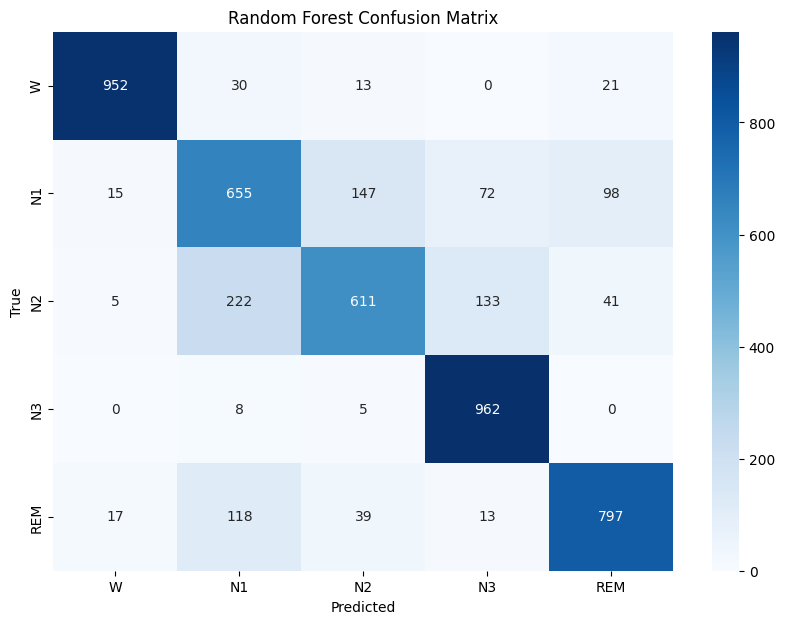

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


rf_results = {
    'classification_report': classification_report(y_test, y_pred, target_names=stage_names, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_pred),
    'confusion_matrix_labels': stage_names
}


print("Random Forest Classification Report:")
print(rf_results['classification_report'])
print(classification_report(y_test, y_pred, target_names=stage_names))


plt.figure(figsize=(10, 7))
sns.heatmap(rf_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=rf_results['confusion_matrix_labels'], yticklabels=rf_results['confusion_matrix_labels'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Support Vector Machine Classifier

In [ ]:
clf_svm = SVC(kernel='rbf', probability=True, random_state=42)
clf_svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = clf_svm.predict(X_test)

# Evaluate the SVM classifier
svm_results = {
    'classification_report': classification_report(y_test, y_pred_svm, target_names=stage_names, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_pred_svm),
    'confusion_matrix_labels': stage_names
}

print("SVM Classification Report:")
print(svm_results['classification_report'])
print(classification_report(y_test, y_pred_svm, target_names=stage_names))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(svm_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_results['confusion_matrix_labels'],
            yticklabels=svm_results['confusion_matrix_labels'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()

### XGBoost Classifier

In [ ]:
# Adjust the labels for XGBoost (convert [1,2,3,4,5] to [0,1,2,3,4]) and cast to int
y_train_xgb = y_train
y_test_xgb = y_test

# Create and train the XGBoost classifier with explicit multi-class objective
clf_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
clf_xgb.fit(X_train, y_train_xgb)
y_pred_xgb = clf_xgb.predict(X_test)

# Evaluate the classifier
xgb_results = {
    'classification_report': classification_report(y_test, y_pred_xgb, target_names=stage_names, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_pred_xgb),
    'confusion_matrix_labels': stage_names
}

print("XGBoost Classification Report:")
print(xgb_results['classification_report'])
print(classification_report(y_test, y_pred_xgb, target_names=stage_names))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(xgb_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=xgb_results['confusion_matrix_labels'],
            yticklabels=xgb_results['confusion_matrix_labels'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.show()


### KNN Classifier

In [ ]:
# Create and train the k-Nearest Neighbors classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = clf_knn.predict(X_test)

# Evaluate the classifier
knn_results = {
    'classification_report': classification_report(y_test, y_pred_knn, target_names=stage_names, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_pred_knn),
    'confusion_matrix_labels': stage_names
}

print("KNN Classification Report:")
print(knn_results['classification_report'])
print(classification_report(y_test, y_pred_knn, target_names=stage_names))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(knn_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_results['confusion_matrix_labels'],
            yticklabels=knn_results['confusion_matrix_labels'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()


## Grid and Random Search
### Optimization of Hyperparameters

### SVM Hyperparameter Tuning (Grid Search)

Best SVM Accuracy: 0.68
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Classification Report:
{'W': {'precision': 0.732824427480916, 'recall': 0.8275862068965517, 'f1-score': 0.7773279352226721, 'support': 232.0}, 'N1': {'precision': 0.5539906103286385, 'recall': 0.42142857142857143, 'f1-score': 0.4787018255578093, 'support': 280.0}, 'N2': {'precision': 0.535593220338983, 'recall': 0.5622775800711743, 'f1-score': 0.5486111111111112, 'support': 281.0}, 'N3': {'precision': 0.7003257328990228, 'recall': 0.7818181818181819, 'f1-score': 0.738831615120275, 'support': 275.0}, 'REM': {'precision': 0.9024390243902439, 'recall': 0.8705882352941177, 'f1-score': 0.8862275449101796, 'support': 255.0}, 'accuracy': 0.6840513983371126, 'macro avg': {'precision': 0.6850346030875608, 'recall': 0.6927397551017194, 'f1-score': 0.6859400063844094, 'support': 1323.0}, 'weighted avg': {'precision': 0.6790218146255397, 'recall': 0.6840513983371126, 'f1-score': 0.6785359277855179, 'supp

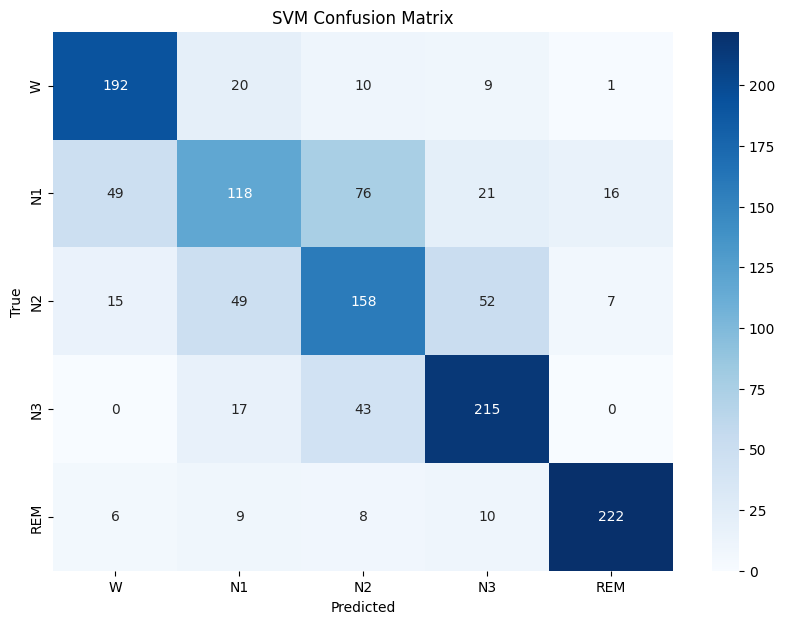

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

baseline_svm = SVC()
baseline_svm.fit(X_train, y_train)

# GridSearchCV object
grid_search = GridSearchCV(estimator=baseline_svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best SVM Accuracy: {accuracy_best:.2f}")
print(f"Best Hyperparameters: {best_params}")


# Evaluate the SVM classifier
svm_results = {
    'classification_report': classification_report(y_test, y_pred_best, target_names=stage_names, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_pred_best),
    'confusion_matrix_labels': stage_names
}

print("SVM Classification Report:")
print(svm_results['classification_report'])
print(classification_report(y_test, y_pred_best, target_names=stage_names))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(svm_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_results['confusion_matrix_labels'],
            yticklabels=svm_results['confusion_matrix_labels'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()

# Best SVM Accuracy: 0.68
# Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

### SVM Hyperparameter Tuning (Random Search)

In [ ]:
# Define parameter distribution for SVM.
svm_param_dist = {
    'C': uniform(0.1, 10),  # Uniform distribution between 0.1 and ~10.1
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50))
}

baseline_svm = SVC(random_state=42)

# Create RandomizedSearchCV for SVM.
svm_random_search = RandomizedSearchCV(
    estimator=baseline_svm,
    param_distributions=svm_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
svm_random_search.fit(X_train, y_train)

# Get best hyperparameters and estimator.
best_params_svm = svm_random_search.best_params_
best_svm = svm_random_search.best_estimator_

# Evaluate the best SVM model.
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Best SVM Accuracy: {accuracy_svm:.2f}")
print(f"Best SVM Hyperparameters: {best_params_svm}")
print(classification_report(y_test, y_pred_svm, target_names=stage_names))

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues',
            xticklabels=stage_names, yticklabels=stage_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.show()

KeyboardInterrupt: 

### XGBoost Classifier Hyperparameter Tuning (Random Search)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:57:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:57:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:58:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU traini

Best XGBoost Accuracy: 0.65
Best XGBoost Hyperparameters: {'colsample_bytree': 0.692708251269958, 'gamma': 0.007983126110107097, 'learning_rate': 0.0792681476866447, 'max_depth': 6, 'n_estimators': 160, 'subsample': 0.8416317594127292}
              precision    recall  f1-score   support

           W       0.72      0.80      0.76       232
          N1       0.53      0.49      0.51       280
          N2       0.45      0.46      0.46       281
          N3       0.69      0.71      0.70       275
         REM       0.92      0.84      0.87       255

    accuracy                           0.65      1323
   macro avg       0.66      0.66      0.66      1323
weighted avg       0.65      0.65      0.65      1323



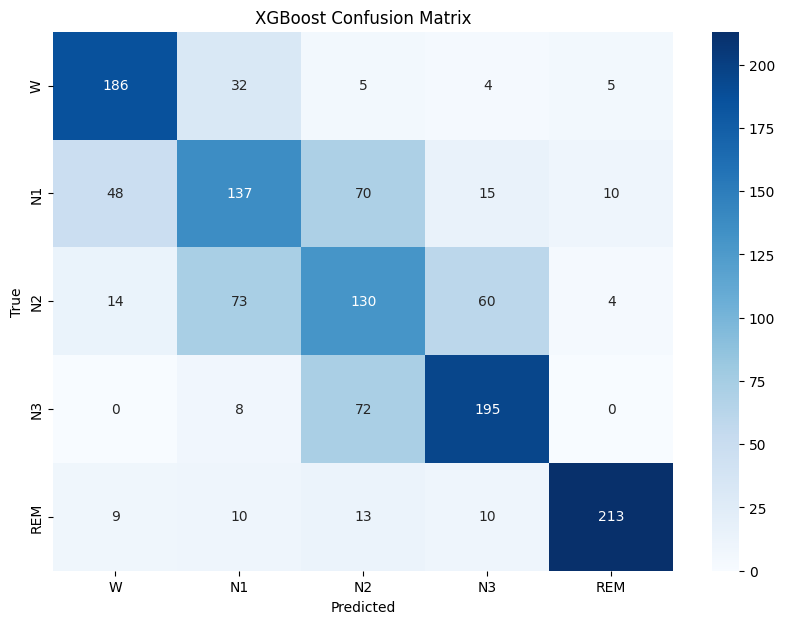

In [ ]:
import torch
gpu_poss = 'gpu_hist' if torch.cuda.is_available() else 'hist'

# Define parameter distributions for XGBoost.
xgb_param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'n_estimators': randint(50, 300),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# Adjust labels for XGBoost: convert [1,2,3,4,5] to [0,1,2,3,4]
y_train_xgb = (y_train - 1).astype(int)
y_test_xgb = (y_test - 1).astype(int)

xgb_clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method=gpu_poss
)

# Create RandomizedSearchCV for XGBoost.
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

xgb_random_search.fit(X_train, y_train_xgb)

# Get best hyperparameters and estimator.
best_params_xgb = xgb_random_search.best_params_
best_xgb = xgb_random_search.best_estimator_

# Evaluate the best XGBoost model.
y_pred_xgb = best_xgb.predict(X_test) + 1
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Best XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"Best XGBoost Hyperparameters: {best_params_xgb}")
print(classification_report(y_test, y_pred_xgb, target_names=stage_names))

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues',
            xticklabels=stage_names, yticklabels=stage_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Best XGBoost Accuracy: 0.65
# Best XGBoost Hyperparameters: {'colsample_bytree': 0.692708251269958, 'gamma': 0.007983126110107097, 'learning_rate': 0.0792681476866447, 'max_depth': 6, 'n_estimators': 160, 'subsample': 0.8416317594127292}

### KNN Hyperparameter Tuning (Grid Search)

Best KNN Accuracy: 0.47
Best KNN Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           W       0.31      0.94      0.47       232
          N1       0.49      0.12      0.20       280
          N2       0.00      0.00      0.00       281
          N3       0.99      0.51      0.67       275
         REM       0.55      0.90      0.68       255

    accuracy                           0.47      1323
   macro avg       0.47      0.49      0.40      1323
weighted avg       0.47      0.47      0.40      1323



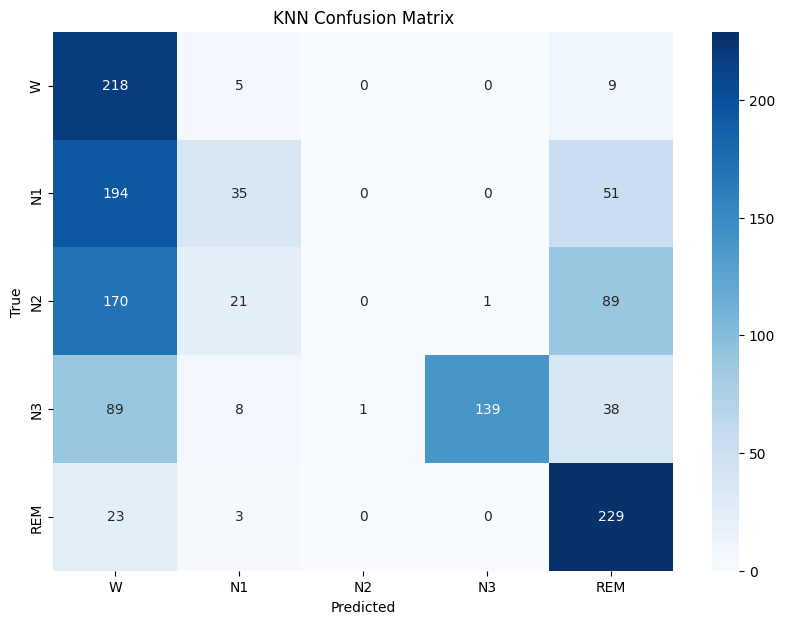

In [ ]:
# Define parameter grid for KNN.
knn_param_grid = {
    'n_neighbors': [5],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(
    estimator=knn_clf,
    param_grid=knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
knn_grid_search.fit(X_train, y_train)

# Get best hyperparameters and estimator.
best_params_knn = knn_grid_search.best_params_
best_knn = knn_grid_search.best_estimator_

# Evaluate the best KNN model.
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Best KNN Accuracy: {accuracy_knn:.2f}")
print(f"Best KNN Hyperparameters: {best_params_knn}")
print(classification_report(y_test, y_pred_knn, target_names=stage_names))

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues',
            xticklabels=stage_names, yticklabels=stage_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()

# Best KNN Accuracy: 0.50
# Best KNN Hyperparameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

### Random Forest Hyperparameter Tuning (Random Search)

Best RandomForest Accuracy: 0.67
Best RandomForest Hyperparameters: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 253}
              precision    recall  f1-score   support

           W       0.79      0.83      0.81       232
          N1       0.54      0.48      0.51       280
          N2       0.48      0.54      0.51       281
          N3       0.70      0.73      0.71       275
         REM       0.94      0.83      0.88       255

    accuracy                           0.67      1323
   macro avg       0.69      0.68      0.68      1323
weighted avg       0.68      0.67      0.68      1323



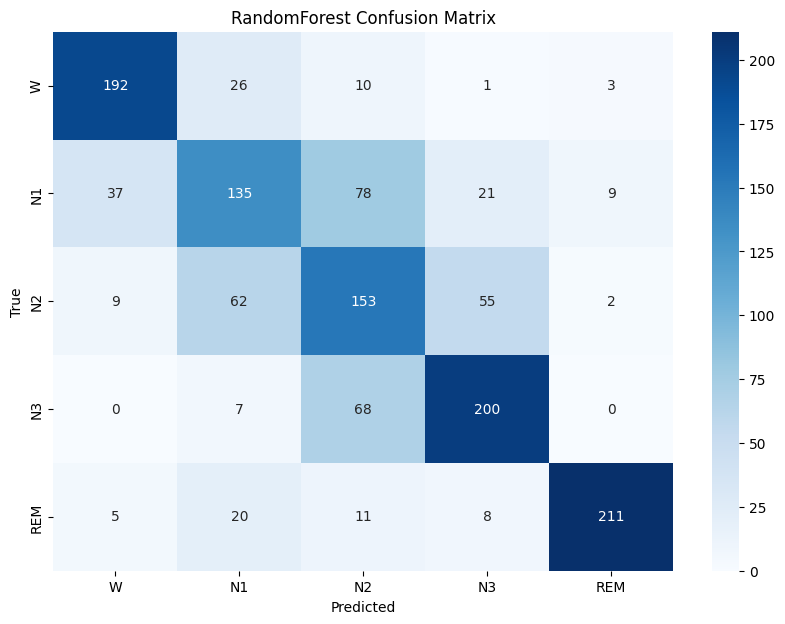

In [ ]:
# Define parameter distributions for RandomForest.
rf_param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(5, 21, 5)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

rf_clf = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=rf_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
rf_random_search.fit(X_train, y_train)

# Get best hyperparameters and estimator.
best_params_rf = rf_random_search.best_params_
best_rf = rf_random_search.best_estimator_

# Evaluate the best RandomForest model.
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Best RandomForest Accuracy: {accuracy_rf:.2f}")
print(f"Best RandomForest Hyperparameters: {best_params_rf}")
print(classification_report(y_test, y_pred_rf, target_names=stage_names))

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=stage_names, yticklabels=stage_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RandomForest Confusion Matrix')
plt.show()

# Best RandomForest Accuracy: 0.67
# Best RandomForest Hyperparameters: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 253}

## Ensemble Learning (Voting Method)
### Using all the best model parameters

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:02:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Voting Classifier Accuracy: 0.85
              precision    recall  f1-score   support

           W       0.77      0.99      0.87      1016
          N1       0.77      0.66      0.71       987
          N2       0.86      0.75      0.80      1012
          N3       0.95      0.99      0.97       975
         REM       0.90      0.84      0.87       984

    accuracy                           0.85      4974
   macro avg       0.85      0.85      0.84      4974
weighted avg       0.85      0.85      0.84      4974



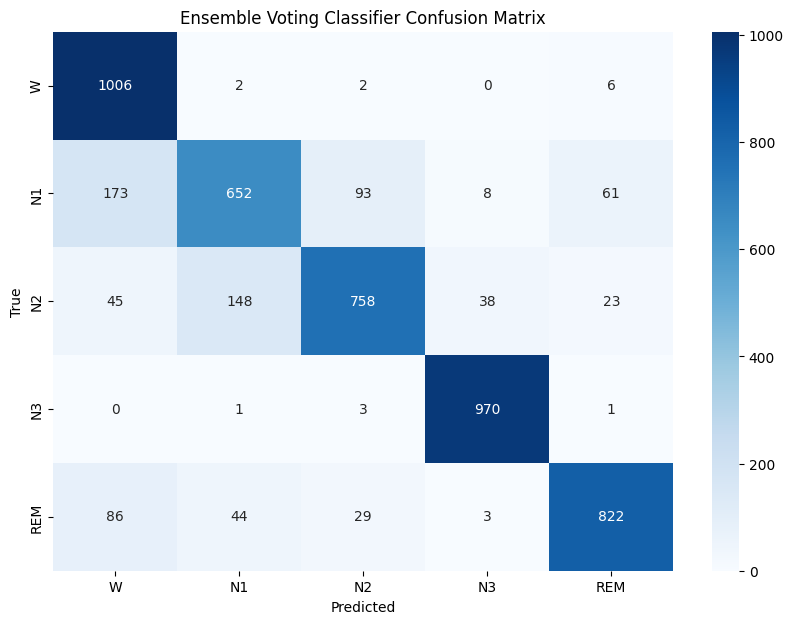

In [ ]:
# Define best models with their optimal hyperparameters.
best_svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)

best_knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)

best_rf = RandomForestClassifier(
    n_estimators=253, min_samples_split=2, min_samples_leaf=1,
    max_depth=15, bootstrap=False, random_state=42
)

best_xgb = XGBClassifier(
    colsample_bytree=0.6927, gamma=0.00798, learning_rate=0.0793,
    max_depth=6, n_estimators=160, subsample=0.8416,
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

# Create a voting ensemble using the best estimators.
ensemble_clf = VotingClassifier(
    estimators=[
        ('knn', best_knn),
        ('svm', best_svm),
        ('xgb', best_xgb),
        ('rf', best_rf)
    ],
    voting='soft'  # 'soft' voting uses predicted probabilities for better decision-making.
)

# Train ensemble model.
ensemble_clf.fit(X_train, y_train)

# Predict on the test set.
y_pred_ensemble = ensemble_clf.predict(X_test)

# Evaluate the model.
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Voting Classifier Accuracy: {accuracy_ensemble:.2f}")
print(classification_report(y_test, y_pred_ensemble, target_names=stage_names))

# Plot confusion matrix.
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Blues',
            xticklabels=stage_names, yticklabels=stage_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Voting Classifier Confusion Matrix')
plt.show()


In [ ]:
# Define best models with their optimal hyperparameters.
best_svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)

best_rf = RandomForestClassifier(
    n_estimators=253, min_samples_split=2, min_samples_leaf=1,
    max_depth=15, bootstrap=False, random_state=42
)

best_xgb = XGBClassifier(
    colsample_bytree=0.6927, gamma=0.00798, learning_rate=0.0793,
    max_depth=6, n_estimators=160, subsample=0.8416,
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

# Create a voting ensemble using the best estimators.
ensemble_clf = VotingClassifier(
    estimators=[
        ('svm', best_svm),
        ('xgb', best_xgb),
        ('rf', best_rf)
    ],
    voting='soft'  # 'soft' voting uses predicted probabilities for better decision-making.
)

# Train ensemble model.
ensemble_clf.fit(X_train, y_train)

# Predict on the test set.
y_pred_ensemble = ensemble_clf.predict(X_test)

# Evaluate the model.
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Voting Classifier Accuracy: {accuracy_ensemble:.2f}")
print(classification_report(y_test, y_pred_ensemble, target_names=stage_names))

# Plot confusion matrix.
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Blues',
            xticklabels=stage_names, yticklabels=stage_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Voting Classifier Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.ensemble import StackingClassifier

# Define best models with their optimal hyperparameters.
best_svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)

best_rf = RandomForestClassifier(
    n_estimators=253, min_samples_split=2, min_samples_leaf=1,
    max_depth=15, bootstrap=False, random_state=42
)

best_xgb = XGBClassifier(
    colsample_bytree=0.6927, gamma=0.00798, learning_rate=0.0793,
    max_depth=6, n_estimators=160, subsample=0.8416,
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

# Create a voting ensemble using the best estimators.
ensemble_clf = VotingClassifier(
    estimators=[
        ('svm', best_svm),
        ('xgb', best_xgb),
        ('rf', best_rf)
    ],
    voting='soft'  # 'soft' voting uses predicted probabilities for better decision-making.
)

# Train ensemble model.
ensemble_clf.fit(X_train, y_train)

# Predict on the test set.
y_pred_ensemble = ensemble_clf.predict(X_test)

# Evaluate the model.
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Voting Classifier Accuracy: {accuracy_ensemble:.2f}")
print(classification_report(y_test, y_pred_ensemble, target_names=stage_names))

# Plot confusion matrix.
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Blues',
            xticklabels=stage_names, yticklabels=stage_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Voting Classifier Confusion Matrix')
plt.show()
